In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn importo
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\boston_housing.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [6]:
x=df.drop('MEDV',axis='columns')
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [12]:
y=df.MEDV
y=df['MEDV']

+

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.33,random_state=0)

In [16]:
print("xtrain shape:",xtrain.shape)
print("xtest shape:",xtest.shape)
print("ytrain shape:",ytrain.shape)
print("ytest shape:",ytest.shape)


xtrain shape: (339, 13)
xtest shape: (167, 13)
ytrain shape: (339,)
ytest shape: (167,)


In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain, ytrain)
y_pred=regressor.predict(xtest)

In [21]:
regressor.coef_

array([-1.19139697e-01,  4.76307169e-02,  3.11385581e-03,  2.51765094e+00,
       -1.65965017e+01,  3.66544866e+00, -1.13971582e-02, -1.58813261e+00,
        2.52228398e-01, -1.08619777e-02, -1.04804097e+00,  6.18082895e-03,
       -5.19802805e-01])

In [23]:
regressor.intercept_

40.82365137166764

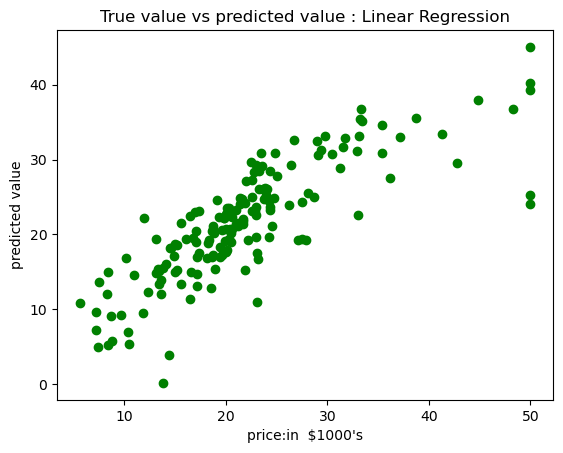

In [30]:
plt.scatter(ytest, y_pred, c='green')
plt.xlabel("price:in  $1000's")
plt.ylabel("predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [27]:
train_score=regressor.score(xtrain,ytrain)
test_score=regressor.score(xtest,ytest)

In [29]:
print('train score (R-Squared):',train_score)
print('test score (R-Squared):',test_score)

train score (R-Squared): 0.7677157140026538
test score (R-Squared): 0.670579541257879


In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(ytest, y_pred)
mae=mean_absolute_error(ytest, y_pred)
print("mean square error : ",mse)
print("mean absolute error : ",mae)

mean square error :  26.55858184204069
mean absolute error :  3.5617190281669013
